# Исследовательский анализ данных в Python и проверка гипотез. 



## Цели и задачи проекта

Цели: понять, как меняются предпочтения пользователей и сценарии их поведения в зависимости от сезона (с 1 июня по 31 октября 2024); сравнить активность пользователей мобильных и стационарных устройств; установить, какие регионы и билетные операторы обеспечивают максимальный приток заказов и выручки.

Задачи: подготовка данных, визуализация, анализ сезонности (летом и осенью) и поведенческих моделей, проверка гипотез (1. среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств и 2. среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.).

## Описание данных



Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:


Второй датасет final_tickets_events_df.csv содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит такие поля:


Выручка от заказов может бы представлена в разных валютах. Удобно будет привести данные к одной — к российским рублям. Датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:




##  Проект 

#### 4.1. Загрузка данных и знакомство с ними
Загрузите данные и получите первую информацию о них. Оцените объём данных, их корректность и соответствие описанию, а также предположите, какие шаги необходимо сделать на стадии предобработки данных. Основные моменты зафиксируйте в промежуточном выводе.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [2]:
final_tickets_orders = pd.read_csv('https://code.s3.yandex.net//datasets/final_tickets_orders_df.csv')
final_tickets_orders.info()
final_tickets_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [3]:
final_tickets_events = pd.read_csv('https://code.s3.yandex.net//datasets/final_tickets_events_df.csv')
final_tickets_events.info()
final_tickets_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [4]:
final_tickets_tenge = pd.read_csv('https://code.s3.yandex.net//datasets/final_tickets_tenge_df.csv')
final_tickets_tenge.info()
final_tickets_tenge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


Датасет о заказах билетов содержит содержит 290 849 строк и 14 столбцов, в days_since_prev есть пропуски. Датасет с информацией о событиях состоит из 22 427 строк и 11 столбцов. Датасет с курсами валют содержит 357 строк и 4 столбца. Колонки created_dt_msk и created_ts_msk нужно преобразования в формат даты-времени, сейчас они представлены в виде строк. Суммы в тенге необходимо перевести в рубли. Пропуски в days_since_prev можно заменить нулевыми значениями. Далее данные можно объединить в один датасет по event_id, так же неоходимо проверить дубликаты по event_id и order_id.

#### 4.2. Предобработка данных и подготовка их к исследованию
Проведите предобработку данных:
- **Проверьте данные на пропуски.** Проверьте, что выгрузка данных из SQL была успешной. Кроме столбца days_since_prev, данные не должны содержать пропусков.
- **Изучите значения в ключевых столбцах** и при обнаружении ошибок обработайте их.
   - *Для категориальных значений* изучите, какие категории присутствуют в данных. Проверьте, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Проведите нормализацию данных, если это необходимо.
   - *Для количественных значений* посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге.
- **Проверьте явные и неявные дубликаты.** Сделайте акцент на неявных дубликатах по бронированию билета без учёта идентификаторов заказа и, если такие будут, примите обоснованное решение, как их стоит обработать.
- **Проведите преобразования типов данных.** Обратите внимание на типы данных с датой и временем, а также проверьте возможность снижения размерности количественных данных.
- **Создайте несколько новых столбцов:**
    - revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год. Значения в рублях представлены для 100 тенге.
    - one_ticket_revenue_rub — рассчитайте выручку с продажи одного билета на мероприятие;
    - month — выделите месяц оформления заказа в отдельный столбец;
    - season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.
    
Рекомендация: вначале можно объединить данные в один датафрейм, а затем провести общую предобработку.
После предобработки проверьте, сколько данных вы отобрали, если выполняли фильтрацию, а также дайте промежуточный вывод с основными действиями и описанием новых столбцов.


In [5]:
merged_data = pd.merge(final_tickets_orders, final_tickets_events, on='event_id', how='inner')

In [6]:
merged_data_values = merged_data.isnull().sum()
display(merged_data_values)

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
dtype: int64

In [7]:


cat_columns = ['currency_code', 'device_type_canonical', 'cinema_circuit', 'age_limit', 'service_name',
               'event_type_main', 'region_name', 'city_name']

for col in cat_columns:
    display(f"Уникальные значения в '{col}':{merged_data[col].unique()}")

"Уникальные значения в 'currency_code':['rub' 'kzt']"

"Уникальные значения в 'device_type_canonical':['mobile' 'desktop']"

"Уникальные значения в 'cinema_circuit':['нет' 'Другое' 'КиноСити' 'Киномакс' 'Москино' 'ЦентрФильм']"

"Уникальные значения в 'age_limit':[16  0 18 12  6]"

"Уникальные значения в 'service_name':['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'\n 'Билеты без проблем' 'Билеты в руки' 'Облачко' 'Дом культуры'\n 'Весь в билетах' 'Лучшие билеты' 'Прачечная' 'Выступления.ру' 'Мир касс'\n 'Тебе билет!' 'Быстробилет' 'Яблоко' 'Show_ticket'\n 'Городской дом культуры' 'Билет по телефону' 'Crazy ticket!' 'Росбилет'\n 'Шоу начинается!' 'Цвет и билет' 'Быстрый кассир' 'Восьмёрка' 'Телебилет'\n 'Реестр' 'КарандашРУ' 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет'\n 'Зе Бест!' 'Тех билет' 'Лимоны' 'Билеты в интернете']"

"Уникальные значения в 'event_type_main':['театр' 'выставки' 'другое' 'стендап' 'концерты' 'спорт' 'ёлки']"

"Уникальные значения в 'region_name':['Каменевский регион' 'Североярская область' 'Озернинский край'\n 'Лугоградская область' 'Поленовский край' 'Широковская область'\n 'Медовская область' 'Златопольский округ' 'Малиновоярский округ'\n 'Яблоневская область' 'Ветренский регион' 'Боровлянский край'\n 'Крутоводская область' 'Ягодиновская область' 'Серебряноярский округ'\n 'Лесодальний край' 'Верхоречная область' 'Горицветская область'\n 'Речиновская область' 'Травиницкий округ' 'Сосновская область'\n 'Серебринская область' 'Травяная область' 'Каменноярский край'\n 'Солнечноземская область' 'Светополянский округ' 'Заречная область'\n 'Ручейковский край' 'Глиногорская область' 'Тепляковская область'\n 'Каменноозёрный край' 'Солнечнореченская область' 'Зоринский регион'\n 'Берёзовская область' 'Лесостепной край' 'Малиновая область'\n 'Синегорский регион' 'Луговая область' 'Шанырский регион'\n 'Каменополянский округ' 'Речицкая область' 'Горностепной регион'\n 'Речицкий регион' 'Золотоключевск

"Уникальные значения в 'city_name':['Глиногорск' 'Озёрск' 'Родниковецк' 'Кристалевск' 'Дальнозолотск'\n 'Радужнополье' 'Радужсвет' 'Кумсай' 'Верховино' 'Светополье' 'Кокжар'\n 'Каменский' 'Лесоярич' 'Никольянов' 'Речинцево' 'Лесозолотск'\n 'Дальнозерск' 'Серебрянка' 'Островецк' 'Родниковец' 'Дальнесветск'\n 'Луговаярово' 'Ягодиновка' 'Дальнополин' 'Солчелуг' 'Озёрчане'\n 'Серебровино' 'Лесоярово' 'Глинополье' 'Глиноград' 'Дальнесветин'\n 'Северополье' 'Теплоозеро' 'Горнодолинск' 'Ордакент' 'Озёрово'\n 'Луговинск' 'Лугоград' 'Златопольск' 'Крутовинск' 'Сарыжар' 'Сосновечин'\n 'Тихоярск' 'Яблонецк' 'Жаркентай' 'Широковка' 'Синеводов' 'Синеводск'\n 'Тихосветск' 'Радужанов' 'Глиногорь' 'Каменосветск' 'Родниковск'\n 'Травогород' 'Глинянск' 'Радужинск' 'Поляногорье' 'Дальнолесье'\n 'Ручейник' 'Ключеград' 'Ключеводск' 'Поленовино' 'Речичанск'\n 'Ключевополье' 'Шаныртау' 'Дальнесоснов' 'Ордасай' 'Теплоозёрск'\n 'Чистогорье' 'Ручейный' 'Островярово' 'Ягодинск' 'Поленоозёрово'\n 'Акбасты' 'Медов

Объединили данные в один датафрейм, проверили пропуски.  Выявлено 21913 пропущенных значений в колонке days_since_prev, замена этих пропусков не требуется, так как они отражают отсутствие покупок и не помешают в дальнейшей работе. Посмотрели значения в категориальных данных (валюта оплаты, тип устройства, сеть кинотеатров, возрастное ограничение, название билетного оператора, основной тип мероприятий, название региона, название города), ошибок нет.

In [8]:
merged_data['revenue'].describe()

count    290611.000000
mean        625.584360
std        1227.693064
min         -90.760000
25%         116.850000
50%         356.010000
75%         810.130000
max       81174.540000
Name: revenue, dtype: float64

In [9]:
merged_data['tickets_count'].describe()

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

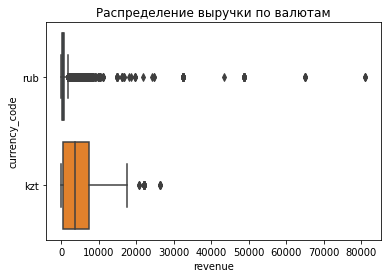

In [10]:
sns.boxplot(x="revenue", y="currency_code", data=merged_data).set(title='Распределение выручки по валютам')
plt.show()

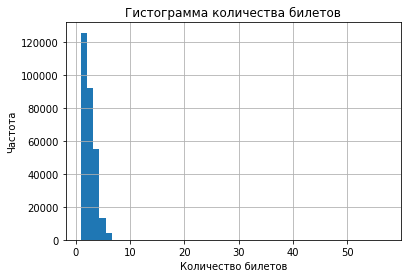

In [11]:
merged_data['tickets_count'].hist(bins=50)
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
plt.title('Гистограмма количества билетов')
plt.show()

С помощью метода describe() проверили статистические показатели. В 'revenue' среднее значение составляет примерно 625.58 рублей, стандартное отклонение достигает 1227.69 рублей, что свидетельствует о высокой вариативности данных.
Максимальное значение 81174.54 значительно превышает медиану и среднее, намекая на возможное присутствие выбросов.
В 'tickets_count' средний показатель количества билетов равен примерно 2.75 шт, умеренное число.
Стандартное отклонение 1.17 тоже умеренное, максимум достигается 57 билетов, большое количество несильно повлияет на общую динамику. Наибольшее подозрение вызывает 'revenue', неоходимо отсечь экстремальные значения, основываясь на критерии верхнего квантильного порога (на уровне 99%). Также были построенв визуализации для проверки распределения и выявления выбросов. Наблюдается значительное количество выбросов, достигающих примерно до 30 тысяч руб. Есть ряд чисел, где выручка доходит до 80 тысяч рублей. Гистограмма показывает распределение количества билетов. Большинство заказов состоят из небольшого количества билетов (1–2 шт) и небольшая группа клиентов приобретает сразу большое количество билетов. 

In [12]:
ruble_data = merged_data[merged_data['currency_code'] == 'rub']
tenge_data = merged_data[merged_data['currency_code'] == 'kzt']

threshold_ruble = ruble_data['revenue'].quantile(0.99)
filtered_ruble_data = ruble_data[ruble_data['revenue'] <= threshold_ruble]

threshold_tenge = tenge_data['revenue'].quantile(0.99)
filtered_tenge_data = tenge_data[tenge_data['revenue'] <= threshold_tenge]

cleaned_merged_data = pd.concat([filtered_ruble_data, filtered_tenge_data])

In [13]:
duplicate_records = cleaned_merged_data.duplicated()
display(f"Явные дубликаты: {duplicate_records.sum()} строк")

'Явные дубликаты: 0 строк'

In [14]:
group_counts = cleaned_merged_data.groupby(['user_id', 'event_id', 'created_dt_msk']).size()
non_unique_combinations = group_counts[group_counts > 1]

if len(non_unique_combinations) > 0:
    display("Обнаружены неявные дубликаты:")
    display(non_unique_combinations)
else:
    display("Неявных дубликатов не найдено")

'Обнаружены неявные дубликаты:'

user_id          event_id  created_dt_msk
000cf0659a9f40f  516728    2024-06-20        8
                           2024-06-21        5
00147c9209d45d3  529218    2024-06-25        2
0020c5654c92ec1  514156    2024-07-02        2
002b75ca606ba46  573041    2024-10-02        2
                                            ..
fff13b79bd47d7c  517065    2024-08-30        5
fffcd3dde79eb2c  33189     2024-10-27        3
                 384441    2024-09-12        2
                 516365    2024-08-21        4
                 554265    2024-08-04        6
Length: 45035, dtype: int64

In [15]:
up_merged_data = cleaned_merged_data.drop_duplicates(subset=['user_id', 'event_id', 'created_dt_msk'], keep='first')

In [16]:
up_merged_data = up_merged_data.copy()

up_merged_data.loc[:, 'created_dt_msk'] = pd.to_datetime(up_merged_data['created_dt_msk'])
up_merged_data.loc[:, 'created_ts_msk'] = pd.to_datetime(up_merged_data['created_ts_msk'])

In [17]:
numeric_colus = up_merged_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_colus:
    if 'float' in str(up_merged_data[column].dtype):
        up_merged_data[column] = pd.to_numeric(up_merged_data[column], downcast='float')
    elif 'int' in str(up_merged_data[column].dtype):
        up_merged_data[column] = pd.to_numeric(up_merged_data[column], downcast='integer')

Отобрали значения по 99-му процентилю. Явных дубликатов нет, обнаружены неявные дубликаты и удалены. Преобразовали даты в правильный формат и оптимизировали память. 

In [18]:
known_dates = final_tickets_tenge['data'].tolist()

valid_merged_data = up_merged_data[up_merged_data['created_dt_msk'].dt.strftime('%Y-%m-%d').isin(known_dates)].copy()

def calculate_revenue_in_rubles(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    elif row['currency_code'] == 'kzt':
        kurs_date = row['created_dt_msk'].strftime('%Y-%m-%d')
        daily_rate = final_tickets_tenge[final_tickets_tenge['data'] == kurs_date]['curs'].values[0]
        return row['revenue'] / 100 * daily_rate
    else:
        raise ValueError("Недопустимая валюта")

valid_merged_data['revenue_rub'] = valid_merged_data.apply(calculate_revenue_in_rubles, axis=1)

In [19]:
valid_merged_data['one_ticket_revenue_rub'] = valid_merged_data['revenue_rub'] / valid_merged_data['tickets_count']

In [20]:
valid_merged_data['month'] = valid_merged_data['created_dt_msk'].dt.month

In [21]:
month_to_season_map = {
    1: 'Зима', 2: 'Зима', 3: 'Весна', 4: 'Весна', 5: 'Весна',
    6: 'Лето', 7: 'Лето', 8: 'Лето', 9: 'Осень', 10: 'Осень', 11: 'Осень', 12: 'Зима'}
valid_merged_data['season'] = valid_merged_data['month'].map(month_to_season_map)

In [22]:
valid_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189830 entries, 0 to 289261
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                189830 non-null  int32         
 1   user_id                 189830 non-null  object        
 2   created_dt_msk          189830 non-null  datetime64[ns]
 3   created_ts_msk          189830 non-null  datetime64[ns]
 4   event_id                189830 non-null  int32         
 5   cinema_circuit          189830 non-null  object        
 6   age_limit               189830 non-null  int8          
 7   currency_code           189830 non-null  object        
 8   device_type_canonical   189830 non-null  object        
 9   revenue                 189830 non-null  float32       
 10  service_name            189830 non-null  object        
 11  tickets_count           189830 non-null  int8          
 12  total                   189830

Создали 4 новых столбца. 'revenue_rub' - привели выручку к рублевому эквиваленту. 'one_ticket_revenue_rub' - средняя выручка с одного билета. Далее выделили месяц 'month' и сезон 'season'.

#### 4.3. Исследовательский анализ данных
##### Анализ распределения заказов по сегментам и их сезонные изменения

Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа изучите изменение пользовательской активности или пользовательского интереса в связи с сезонностью.

Анализируйте динамику по таким разрезам:
- тип мероприятия event_type_main;
- тип устройства device_type_canonical;
- категория мероприятий по возрастному рейтингу age_limit.

В этом разделе изучите распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги:
- **Для каждого месяца найдите количество заказов** и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.
- **Для осеннего и летнего периодов сравните распределение заказов билетов** по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли.
- **Изучите изменение выручки с продажи одного билета** в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? Для каждого типа мероприятия рассчитайте среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией.
- **Сделайте вывод** о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

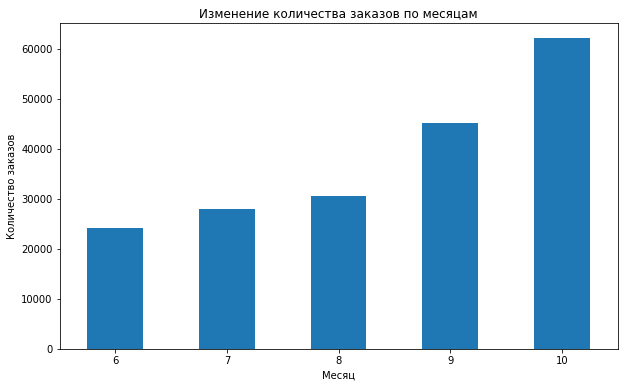

In [23]:
monthly_orders = valid_merged_data.groupby('month')['order_id'].count()
monthly_orders.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Изменение количества заказов по месяцам')
plt.xticks(rotation=0)
plt.show()

К осени наблюдается рост заказов.

season,Лето,Осень
event_type_main,,
выставки,0.021918,0.016196
другое,0.271010,0.211935
концерты,0.432042,0.392550
спорт,0.021276,0.068662
стендап,0.056963,0.045893
театр,0.194442,0.254331
ёлки,0.002349,0.010434


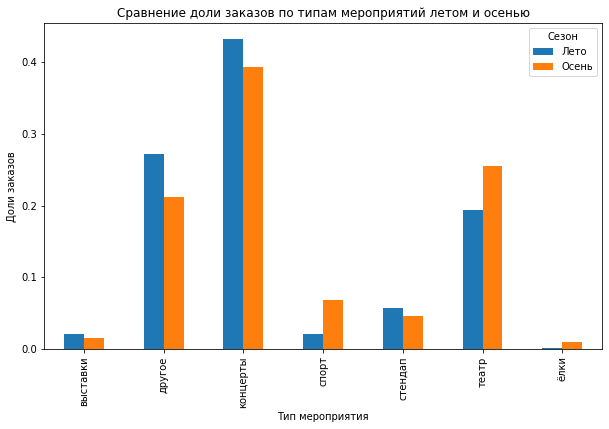

In [24]:
fall_summer_comparison = valid_merged_data.query("month in [6, 7, 8, 9, 10]")
fall_summer_grouped = fall_summer_comparison.groupby(['event_type_main', 'season'])['order_id'].count().unstack(fill_value=0)
fall_summer_grouped_pct = fall_summer_grouped.divide(fall_summer_grouped.sum(axis=0), axis=1)
display(fall_summer_grouped_pct)

fall_summer_grouped_pct.plot(kind='bar', figsize=(10, 6))
plt.legend(title='Сезон')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доли заказов')
plt.title('Сравнение доли заказов по типам мероприятий летом и осенью')
plt.show()

Наблюдаем популярность мероприятия  "театр", "елки", "спорт" в осенний период, "стендап" более популярен в летний сезон. 

season,Лето,Осень
device_type_canonical,,
desktop,0.187212,0.184597
mobile,0.812788,0.815403


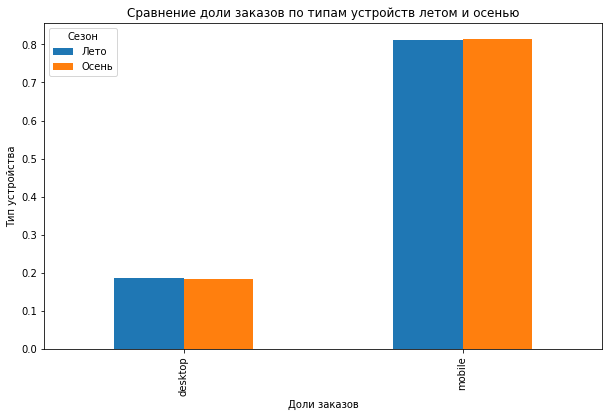

In [25]:
fall_summer_device = fall_summer_comparison.groupby(['device_type_canonical', 'season'])['order_id'].count().unstack(fill_value=0)
fall_summer_device_pct = fall_summer_device.divide(fall_summer_device.sum(axis=0), axis=1)
display(fall_summer_device_pct)

fall_summer_device_pct.plot(kind='bar', figsize=(10, 6)) 
plt.legend(title='Сезон')
plt.xlabel('Доли заказов')
plt.ylabel('Тип устройства')
plt.title('Сравнение доли заказов по типам устройств летом и осенью')
plt.show()

Сезонность не влияет на использование типа устройств.

season,Лето,Осень
age_limit,,
0,0.178651,0.201156
6,0.180262,0.188448
12,0.201756,0.226480
16,0.285650,0.267273
18,0.153681,0.116643


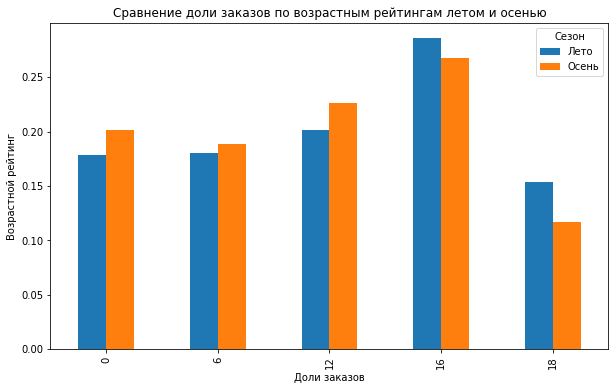

In [26]:
fall_summer_age = fall_summer_comparison.groupby(['age_limit', 'season'])['order_id'].count().unstack(fill_value=0)
fall_summer_age_pct = fall_summer_age.divide(fall_summer_age.sum(axis=0), axis=1)
display(fall_summer_age_pct)

fall_summer_age_pct.plot(kind='bar', figsize=(10, 6))
plt.legend(title='Сезон')
plt.xlabel('Доли заказов')
plt.ylabel('Возрастной рейтинг')
plt.title('Сравнение доли заказов по возрастным рейтингам летом и осенью')
plt.show()

Осенью падает интерес у мероприятий с возрастным рейтингом.  

avg_ticket_price
event_type_main season                  
выставки        Лето           86.979815
                Осень          90.902630
другое          Лето           79.832967
                Осень          78.629488
концерты        Лето          295.576288
                Осень         273.455310
спорт           Лето           57.698445
                Осень          58.576498
стендап         Лето          215.144685
                Осень         231.886412
театр           Лето          211.914825
                Осень         176.583102
ёлки            Лето          277.689869
                Осень         233.073022

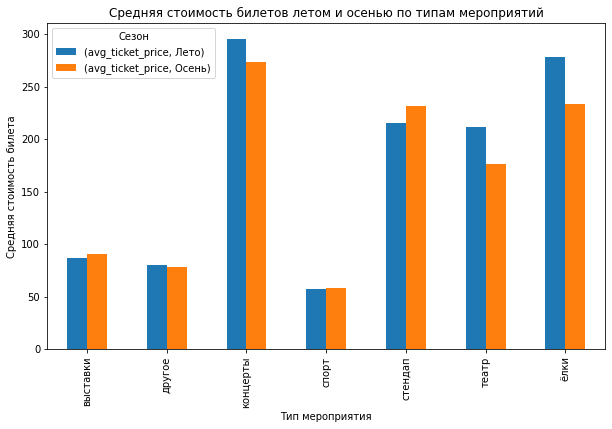

In [27]:
ticket_price_analysis = valid_merged_data.query("month in [6, 7, 8, 9, 10]")[['event_type_main', 'season', 'one_ticket_revenue_rub']]\
                    .groupby(['event_type_main', 'season'])\
                    .agg({'one_ticket_revenue_rub': 'mean'})\
                    .rename(columns={'one_ticket_revenue_rub': 'avg_ticket_price'})
display(ticket_price_analysis)

ticket_price_analysis.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя стоимость билета')
plt.title('Средняя стоимость билетов летом и осенью по типам мероприятий')
plt.legend(title='Сезон')
plt.show()

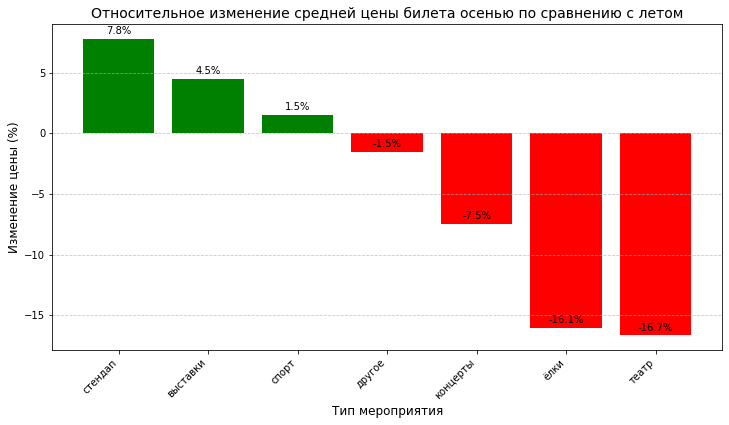

In [28]:
ticket_price_unstacked = ticket_price_analysis.unstack()
ticket_price_unstacked.columns = ticket_price_unstacked.columns.get_level_values(1)
ticket_price_change = ((ticket_price_unstacked['Осень'] - ticket_price_unstacked['Лето']) / ticket_price_unstacked['Лето']) * 100
ticket_price_change=ticket_price_change.sort_values(ascending=False)
colors = ['green' if val >= 0 else 'red' for val in ticket_price_change.values]

plt.figure(figsize=(12, 6))
bars = plt.bar(ticket_price_change.index, ticket_price_change.values, color=colors)
plt.xlabel('Тип мероприятия', fontsize=12)
plt.ylabel('Изменение цены (%)', fontsize=12)
plt.title('Относительное изменение средней цены билета осенью по сравнению с летом', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

В летний период цена билетов на концерты, театры, ёлки увеличивается. Наблюдается рост заказов в осенний период, начиная с сентября. Летом популярностью пользовались концерты (43%), осенью стали более востребованы театры (25%). Независимо от сезона подавляющее большинство заказов (более 80%) осуществляется с мобильных устройств. Осенью возрастает спрос на мероприятия с возрастным лимитом 0+, 6+ и 12+, а мероприятия с высоким возрастом допуска (18+) становятся менее популярны. Театральные билеты подешевели сильнее всего осенью, билеты на концерты так же потеряли в цене осенью. Возможно, осенью проводят больше культурных мероприятий и для привлечения зрителей вводятся сезонные скидки. Стендап и выставки, наоборот, подоражили осенью, скорее всего это связано с новыми музейными экспозициями после летних каникул и свежими шутками от комиков после отдыха.

 ##### Осенняя активность пользователей

Изучите активность пользователей осенью 2024 года. В вашем распоряжении данные за два осенних месяца. Используйте только эти данные и сделайте следующее:
- **Проанализируйте динамику изменений по дням для:**
    - общего числа заказов;
    - количества активных пользователей DAU;
    - среднего числа заказов на одного пользователя;
    - средней стоимости одного билета.
Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.
- **Изучите недельную цикличность.** Выделите день недели и сравните пользовательскую активность в будни и выходные.
- **Напишите промежуточный вывод** о пользовательской активности и недельной цикличности.

In [29]:
autumn_data = valid_merged_data[
    (valid_merged_data['created_dt_msk'].dt.month >= 9) &
    (valid_merged_data['created_dt_msk'].dt.month <= 10)
].copy()

autumn_data['day_of_week'] = autumn_data['created_dt_msk'].dt.day_name()
autumn_data['day_of_week_num'] = autumn_data['created_dt_msk'].dt.weekday

In [30]:
daily_activity = autumn_data.groupby('created_dt_msk').agg(
    total_orders=('order_id', 'count'),
    unique_users=('user_id', 'nunique'),
    total_revenue_rub=('revenue_rub', 'sum'))

daily_activity['orders_per_user'] = daily_activity['total_orders'] / daily_activity['unique_users']
daily_activity['avg_ticket_price'] = daily_activity['total_revenue_rub'] / daily_activity['total_orders']

display(daily_activity.head())

,total_orders,unique_users,total_revenue_rub,orders_per_user,avg_ticket_price
created_dt_msk,,,,,
2024-09-01,900,564,477964.184924,1.595745,531.071317
2024-09-02,984,574,499350.386365,1.714286,507.469905
2024-09-03,1537,778,582228.462064,1.975578,378.808368
2024-09-04,1170,686,582043.423558,1.705539,497.473012
2024-09-05,1359,739,702161.490159,1.838972,516.675122


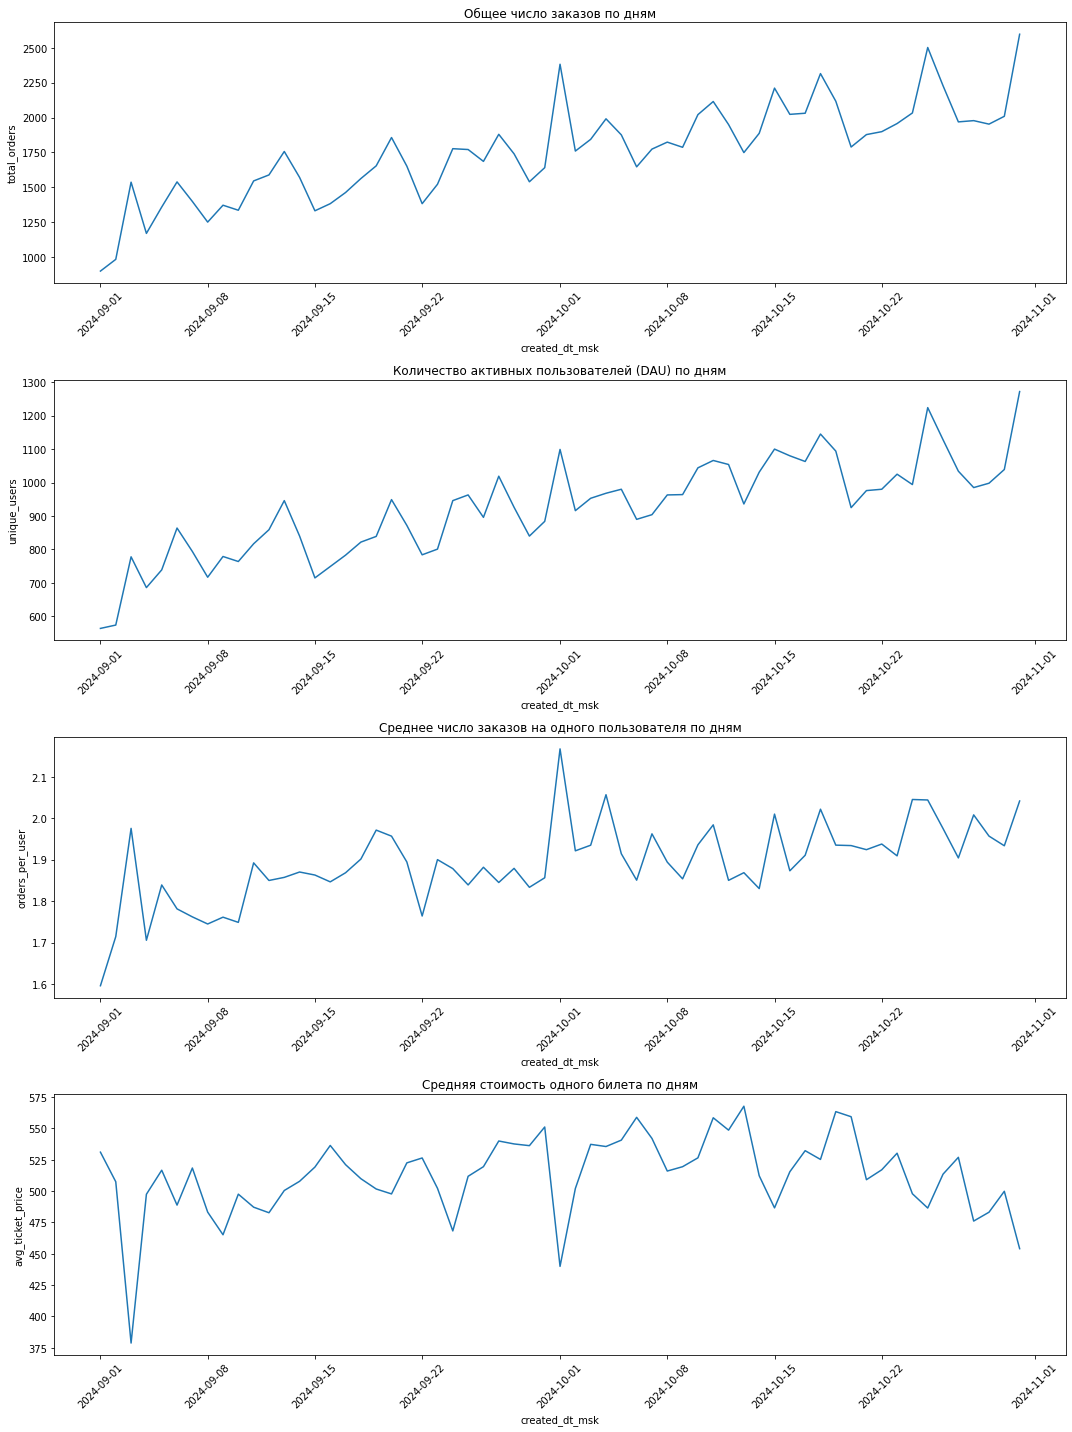

In [31]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

sns.lineplot(ax=axes[0], data=daily_activity, x=daily_activity.index, y='total_orders')
axes[0].set_title('Общее число заказов по дням')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1], data=daily_activity, x=daily_activity.index, y='unique_users')
axes[1].set_title('Количество активных пользователей (DAU) по дням')
axes[1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[2], data=daily_activity, x=daily_activity.index, y='orders_per_user')
axes[2].set_title('Среднее число заказов на одного пользователя по дням')
axes[2].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[3], data=daily_activity, x=daily_activity.index, y='avg_ticket_price')
axes[3].set_title('Средняя стоимость одного билета по дням')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [32]:
weekday_activity = autumn_data.groupby('day_of_week_num').agg(
    total_orders=('order_id', 'count'),
    unique_users=('user_id', 'nunique'),
    total_revenue_rub=('revenue_rub', 'sum'))

weekday_activity['orders_per_user'] = weekday_activity['total_orders'] / weekday_activity['unique_users']
weekday_activity['avg_ticket_price'] = weekday_activity['total_revenue_rub'] / weekday_activity['total_orders']

weekday_activity.index = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
display(weekday_activity)

,total_orders,unique_users,total_revenue_rub,orders_per_user,avg_ticket_price
Пн,14419,4446,7.374332e+06,3.243140,511.431560
Вт,16382,4794,7.832029e+06,3.417188,478.087489
Ср,15586,4815,7.935229e+06,3.236968,509.125442
Чт,16814,4970,8.502287e+06,3.383099,505.667132
Пт,15956,4870,8.251863e+06,3.276386,517.163639
Сб,14533,4574,7.742674e+06,3.177307,532.764983
Вс,13560,4395,7.279473e+06,3.085324,536.834314


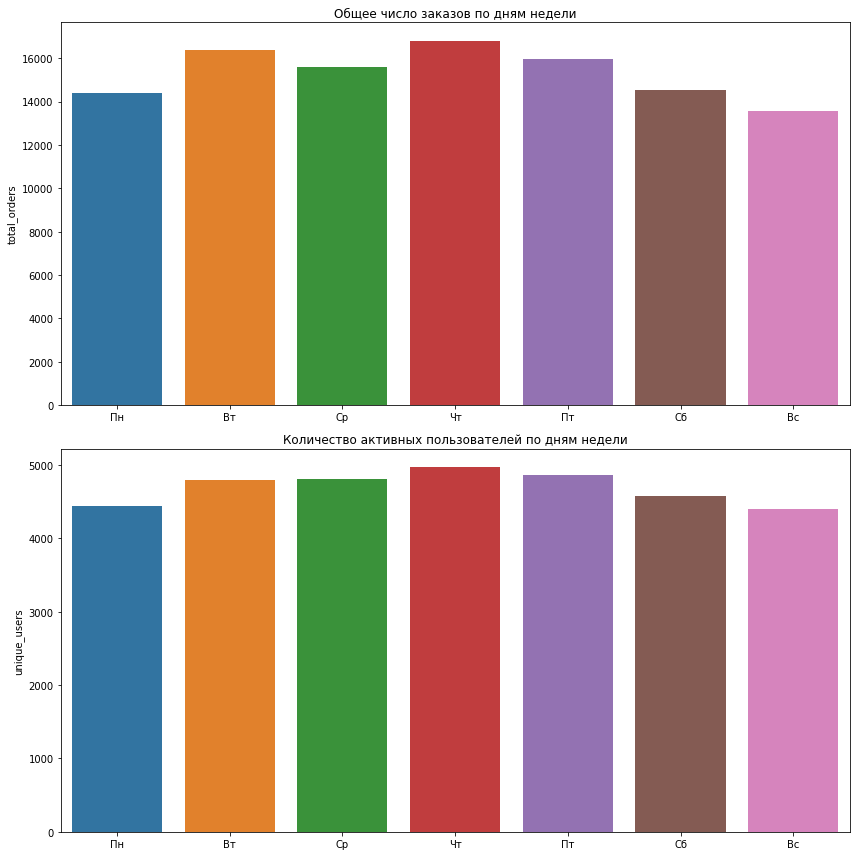

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(ax=axes[0], data=weekday_activity, x=weekday_activity.index, y='total_orders')
axes[0].set_title('Общее число заказов по дням недели')

sns.barplot(ax=axes[1], data=weekday_activity, x=weekday_activity.index, y='unique_users')
axes[1].set_title('Количество активных пользователей по дням недели')

plt.tight_layout()
plt.show()

Четкого тренда постоянного роста или спада числа заказов и выручки не наблюдалось - плавная потребительская активность. На начало периода 1 сент ативность 900 заказов, пик заказов 3 сент 1537, потом немного снизилась, но была все равно высокой. Цена варьировалась умеренно, колебалась от 378 до 531 рубля за билет. Максимальная стоимость в первый день (1 сент). Количество уникальных пользователей (DAU) составляло от 564 до 778 человек, указывает на стабильность вовлечённости.
На одного активного пользователя приходилось от 1,6 до 1,9 заказов, это свидетельствует о высоком количестве однократных покупок. Самая высокая активность приходится на вторник и четверг, когда зарегистрировано максимальное количество заказов. Совпадение аномальных всплесков средней цены и количества заказов может говорить о проведении акций/распродаж в эти дни. Самые активные дни приходятся на середину недели. Суббота и воскресенье показывают наименьшую активность, хотя разница между рабочими и выходными днями невелика. Стоимость билетов самая низкая в середине недели (во вторник), повышаясь к концу недели (суббота и воскресенье). 


##### Популярные события и партнёры
После того как изучите изменение популярности событий и пользовательской активности осенью 2024 года, посмотрите, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.
- Для каждого **региона** посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?
- Для каждого **билетного партнёра** посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

Рекомендация: исследуйте не только абсолютные значения, но и доли. Например, для каждого региона посчитайте долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.

В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли явные лидеры среди регионов и партнёров?



In [34]:

regional_data = autumn_data.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'))

total_events = regional_data['unique_events'].sum()
total_orders = regional_data['total_orders'].sum()

regional_data['event_share'] = regional_data['unique_events'] / total_events
regional_data['order_share'] = regional_data['total_orders'] / total_orders
regional_data = regional_data.sort_values(by='unique_events', ascending=False)

display(regional_data)

,unique_events,total_orders,event_share,order_share
region_name,,,,
Каменевский регион,3910,30854,0.246284,0.287683
Североярская область,2613,14561,0.164588,0.135767
Широковская область,803,5866,0.050579,0.054695
Светополянский округ,764,3135,0.048123,0.029231
Речиновская область,529,2397,0.033321,0.022350
...,...,...,...,...
Залесский край,4,33,0.000252,0.000308
Островогорский округ,4,12,0.000252,0.000112
Верхозёрский край,2,5,0.000126,0.000047


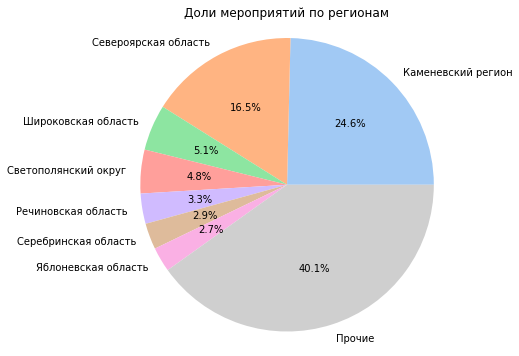

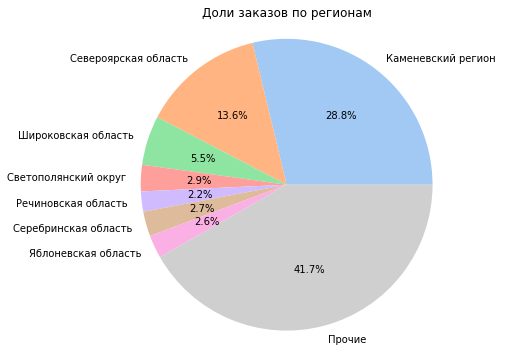

In [35]:
top_regions = regional_data.nlargest(7, 'unique_events').index


regional_data_filtered = regional_data.copy()
remaining_indices = ~regional_data.index.isin(top_regions)
regional_data_filtered.loc['Прочие'] = regional_data_filtered.loc[remaining_indices].sum(numeric_only=True)
regional_data_filtered = regional_data_filtered.reindex(index=list(top_regions) + ['Прочие'])
total_events = regional_data_filtered['unique_events'].sum()
total_orders = regional_data_filtered['total_orders'].sum()
regional_data_filtered['event_share'] = regional_data_filtered['unique_events'] / total_events
regional_data_filtered['order_share'] = regional_data_filtered['total_orders'] / total_orders


plt.figure(figsize=(8, 6))
plt.pie(regional_data_filtered['event_share'], labels=regional_data_filtered.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Доли мероприятий по регионам')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(regional_data_filtered['order_share'], labels=regional_data_filtered.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Доли заказов по регионам')
plt.axis('equal')
plt.show()


Каменевский регион лидирует как по количеству мероприятий (3910), так и по количеству заказов (30854).Североярская область занимает второе место, имея значительное количество мероприятий (2613) и заказов (14561). Широковская область и Светополянский округ занимают третье и четвертое место, но их активность значительно уступает первым двум регионам. Для визуализации были выбраны топ-7 регионов по показателям, остальные регионы были распределены в "Прочие" (доля их 41.7%). Каменевский регион удерживает лидерство как по объему мероприятий, так и по общему числу заказов. Доля по мероприятий 24.6 % приходится на Каменевский регион и 28.8% по заказам. У Североярской области доля мероприятий 16.5 и 13.6 по заказам. Залесский край, Островогорский округ и Верхозёрский край предлагают минимальные объемы мероприятий и заказов, что подчеркивает разницу в развитии инфраструктуры и заинтересованности жителей в культурной жизни.

In [36]:
partner_data = autumn_data.groupby('cinema_circuit').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum'))

total_events = partner_data['unique_events'].sum()
total_orders = partner_data['total_orders'].sum()
total_revenue = partner_data['total_revenue'].sum()

partner_data['event_share'] = partner_data['unique_events'] / total_events
partner_data['order_share'] = partner_data['total_orders'] / total_orders
partner_data['revenue_share'] = partner_data['total_revenue'] / total_revenue

partner_data = partner_data.sort_values(by='total_revenue', ascending=False)
display(partner_data)

,unique_events,total_orders,total_revenue,event_share,order_share,revenue_share
cinema_circuit,,,,,,
нет,15826,106656,5.451500e+07,0.993097,0.994462,0.992664
Другое,104,527,3.762711e+05,0.006526,0.004914,0.006852
КиноСити,2,63,2.322364e+04,0.000126,0.000587,0.000423
Москино,3,3,3.007540e+03,0.000188,0.000028,0.000055
Киномакс,1,1,3.895400e+02,0.000063,0.000009,0.000007


Группа "нет"- лидирует по количеству мероприятий (15826), количеству заказов (106656) и общей выручке (54 млн рублей).
Занимает доминирующее положение на рынке, контролируя более 99% общего числа мероприятий и заказов. Второе место занимает "Другое" - 104 мероприятия и 527 заказов, скромная доля рынка (менее 1%). КиноСити, Москино, Киномакс имеют крайне низкую активность( всего несколько мероприятий и заказов).

### 5. Статистический анализ данных

Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- **Среднее количество заказов** на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- **Среднее время между заказами** пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
Перед проведением гипотез изучите сравниваемые данные, обоснуйте выбор статистического теста, укажите формулировку нулевой и альтернативной гипотез. 

Результаты тестов прокомментируйте в промежуточном выводе. 

Используйте данные только за осенний период

Формулировка гипотезы 1:
- H₀ (нулевая гипотеза): среднее количество заказов на одного пользователя одинаково для мобильных и стационарных устройств.
- H₁ (альтернативная гипотеза): среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.


In [37]:
orders_per_user_mobile = autumn_data.query("device_type_canonical == 'mobile'").groupby('user_id')['order_id'].count()
orders_per_user_desktop = autumn_data.query("device_type_canonical == 'desktop'").groupby('user_id')['order_id'].count()

statistic, p_value = mannwhitneyu(orders_per_user_mobile, orders_per_user_desktop, alternative='greater')
display(f"Статистика теста: {statistic}, p-value: {p_value:}")

alpha = 0.05
if p_value < alpha:
    display("Гипотеза H₁ принимается: среднее количество заказов на пользователя мобильного устройства выше")
else:
    display("Гипотеза H₀ принимается: разницы в среднем числе заказов нет")

'Статистика теста: 36035148.5, p-value: 1.6566614302695267e-13'

'Гипотеза H₁ принимается: среднее количество заказов на пользователя мобильного устройства выше'

Используется непараметрический критерий Манна-Уитни (выбор основан на отсутствии уверенности в нормальности распределения данных). Так как полученный p-value значительно меньше выбранного уровня значимости a=0.05, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу: среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. 

Формулировка гипотезы 2:
- H₀ (нулевая гипотеза): среднее время между заказами одинаково для мобильных и стационарных устройств.
- H₁ (альтернативная гипотеза): среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [38]:
autumn_data['prev_order_time'] = autumn_data.groupby('user_id')['created_dt_msk'].shift(-1)
autumn_data['time_between_orders'] = (autumn_data['prev_order_time'] - autumn_data['created_dt_msk']).dt.total_seconds() / 3600 

time_between_orders_mobile = autumn_data.query("device_type_canonical == 'mobile' & time_between_orders.notna()")['time_between_orders']
time_between_orders_desktop = autumn_data.query("device_type_canonical == 'desktop' & time_between_orders.notna()")['time_between_orders']

statistic, p_value = mannwhitneyu(time_between_orders_mobile, time_between_orders_desktop, alternative='greater')
display(f"Статистика теста: {statistic}, p-value: {p_value:}")

alpha = 0.05
if p_value < alpha:
    display("Гипотеза H₁ принимается: среднее время между заказами у мобильных пользователей выше")
else:
    display("Гипотеза H₀ принимается: разницы во времени между заказами нет")

'Статистика теста: 638212354.5, p-value: 0.1978171028271114'

'Гипотеза H₀ принимается: разницы во времени между заказами нет'

Поскольку данные могут быть ненормально распределёнными и мы имеем две независимые выборки (пользователи мобильных и стационарных устройств), правильным выбором будет непараметрический тест Манна-Уитни. p-value: 0.1978 говорит о том, что вероятность случайного совпадения наблюдаемых данных с нулевой гипотезой достаточно велика (больше принятой границы в 0.05). Гипотеза H₀ принимается: среднее время между заказами одинаково для мобильных и стационарных устройств.

### 6. Общий вывод и рекомендации
В конце проекта напишите общий вывод и рекомендации — на что обратить внимание. В выводах коротко укажите:
- **Информацию о данных**, с которыми вы работали.
- **Основные результаты анализа:** какие мероприятия наиболее востребованы, как изменилась популярность мероприятий осенью, как изменилась стоимость среднего чека. Какую информацию можно получить после изучения пользовательской активности? Существуют ли среди регионов и партнёров явные лидеры по числу заказов и выручке с продажи билетов? Дополните вывод другой информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.
- Прокомментируйте **результаты проверки гипотез.**

В конце предложите рекомендации, на что стоит обратить внимание в первую очередь.

- Была проведена работа с датасетом, в котором хранилась информация обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных, с датасетом, который содержал иформацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия и с датасетом с информацией о курсе тенге к российскому рублю за 2024 год. Данные были предобработаны и подготовлены к исследованию.
- Работа проводилась с данными о продаже билетов за осенний период 2024 года (сентябрь-октябрь). Были использованы агрегированные данные по регионам, билетным партнёрам, типам мероприятий и типам устройств (мобильные и стационарные). Самые популярные виды мероприятий осенью - концерты и театр. Летом популярность концертов была выше, осенью же возросло количество театральных представлений. Средняя стоимость билетов слегка уменьшилась осенью по большинству категорий, за исключением спорта и стендапа, где наблюдался небольшой рост. Наибольшая активность пользователей наблюдается во вторник и четверг. Каменевский регион и группа "нет" доминировали как по количеству мероприятий, так и по числу заказов и выручке. Другие регионы показали значительно меньшую активность. С наступлением осени количество заказов выросло, но средняя стоимость билетов снизилась. Это явление можно объяснить несколькими причинами: осенью увеличивается активность пользователей, возвращающихся после летнего отдыха, осенью так же компании часто вводят сезонные акции и скидки, чтобы увеличить продажи.
-  Принята гипотеза (1) H₁: пользователи мобильных устройств совершают больше заказов на одного пользователя, чем пользователи стационарных устройств. Принята гипотеза (2) H₀: нет существенных различий во времени между заказами у мобильных и стационарных пользователей.

Пользователи мобильных устройств демонстрируют повышенную активность, поэтому внедрение персональных рекомендаций и уведомлений поможет увеличить количество заказов. Необходимо сосредоточиться на привлечении посетителей театров, где отмечено сокращение среднего чека. Мелкие регионы нуждаются в поддержке, следует запустить пилотные проекты для привлечения аудитории и наращивания активности. Наблюдается положительная тенденция возврата пользователей после летнего затишья, что подтверждает перспективность усиления активности осенью.
